### Problem 01 - Salary Classification.
1) Prepare a classification model using Naive Bayes 

#### 1. importing necessary libraries

In [95]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#### 2. Importing the Data

In [5]:
data_1_train = pd.read_csv('SalaryData_Train.csv')
data_1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
data_a_test = pd.read_csv('SalaryData_Test.csv')
data_a_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#### 3. Data Understanding

In [14]:
print(data_1_train.dtypes) 

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object


In [15]:
print(data_a_test.dtypes)

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object


In [16]:
data_1_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
data_a_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
data_1_train.shape, data_a_test.shape

((30161, 14), (15060, 14))

In [20]:
data_1_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [22]:
data_a_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [23]:
data_1_train['Salary'].value_counts(),data_a_test['Salary'].value_counts() 

( <=50K    22653
  >50K      7508
 Name: Salary, dtype: int64,
  <=50K    11360
  >50K      3700
 Name: Salary, dtype: int64)

In [24]:
# data given for Test and Train are highly unbalanced.
## from now we will use only training data to build the model.
### data is imbalanced in approx 3 : 1 ratio

#### 4. Data Preparation

In [47]:
data_1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,Assoc-acdm,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,HS-grad,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,HS-grad,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,HS-grad,9,4,0,3,4,1,0,0,20,37,0


In [48]:
# SVM is non parametric thus we will use lable encoder

In [49]:
labelencoder = LabelEncoder()

In [50]:
data_1_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [51]:
data_1_train['education'].value_counts(), data_1_train['educationno'].value_counts()

( HS-grad         9840
  Some-college    6677
  Bachelors       5044
  Masters         1627
  Assoc-voc       1307
  11th            1048
  Assoc-acdm      1008
  10th             820
  7th-8th          557
  Prof-school      542
  9th              455
  12th             377
  Doctorate        375
  5th-6th          288
  1st-4th          151
  Preschool         45
 Name: education, dtype: int64,
 9     9840
 10    6677
 13    5044
 14    1627
 11    1307
 7     1048
 12    1008
 6      820
 4      557
 15     542
 5      455
 8      377
 16     375
 3      288
 2      151
 1       45
 Name: educationno, dtype: int64)

In [52]:
# Education and Education No from the columns are already encoded by label encoder
# thus we will drop education column

In [53]:
data_1_train['workclass'] = labelencoder.fit_transform(data_1_train['workclass'])

In [54]:
data_1_train['maritalstatus'] = labelencoder.fit_transform(data_1_train['maritalstatus'])

In [55]:
data_1_train['occupation'] = labelencoder.fit_transform(data_1_train['occupation'])

In [56]:
data_1_train['relationship'] = labelencoder.fit_transform(data_1_train['relationship'])

In [57]:
data_1_train['race'] = labelencoder.fit_transform(data_1_train['race'])

In [58]:
data_1_train['sex'] = labelencoder.fit_transform(data_1_train['sex'])

In [59]:
data_1_train['native'] = labelencoder.fit_transform(data_1_train['native'])

In [60]:
data_1_train['Salary'] = labelencoder.fit_transform(data_1_train['Salary'])

In [61]:
data_1_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,Assoc-acdm,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,HS-grad,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,HS-grad,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,HS-grad,9,4,0,3,4,1,0,0,20,37,0


In [66]:
X_train= data_1_train.drop(labels = ['Salary', 'education'], axis = 1)
y_train = data_1_train[['Salary']]

In [67]:
X_train.dtypes

age              int64
workclass        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
dtype: object

In [68]:
y_train.dtypes

Salary    int64
dtype: object

In [69]:
X_train.shape, y_train.shape

((30161, 12), (30161, 1))

#### +++++++++

In [74]:
data_a_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [75]:
data_a_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [77]:
data_a_test['education'].value_counts(), data_a_test['educationno'].value_counts()

( HS-grad         4943
  Some-college    3221
  Bachelors       2526
  Masters          887
  Assoc-voc        652
  11th             571
  Assoc-acdm       499
  10th             403
  7th-8th          266
  Prof-school      243
  9th              221
  12th             200
  Doctorate        169
  5th-6th          161
  1st-4th           71
  Preschool         27
 Name: education, dtype: int64,
 9     4943
 10    3221
 13    2526
 14     887
 11     652
 7      571
 12     499
 6      403
 4      266
 15     243
 5      221
 8      200
 16     169
 3      161
 2       71
 1       27
 Name: educationno, dtype: int64)

In [78]:
# Education and Education No from the columns are already encoded by label encoder
# thus we will drop education column

In [130]:
data_a_test['workclass'] = labelencoder.fit_transform(data_a_test['workclass'])

In [131]:
data_a_test['maritalstatus'] = labelencoder.fit_transform(data_a_test['maritalstatus'])

In [132]:
data_a_test['occupation'] = labelencoder.fit_transform(data_a_test['occupation'])

In [133]:
data_a_test['relationship'] = labelencoder.fit_transform(data_a_test['relationship'])

In [134]:
data_a_test['race'] = labelencoder.fit_transform(data_a_test['race'])

In [135]:
data_a_test['sex'] = labelencoder.fit_transform(data_a_test['sex'])

In [136]:
data_a_test['native'] = labelencoder.fit_transform(data_a_test['native'])

In [137]:
data_a_test['Salary'] = labelencoder.fit_transform(data_a_test['Salary'])

In [138]:
data_a_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,Bachelors,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,Bachelors,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,Bachelors,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,Bachelors,13,0,0,3,1,1,5455,0,40,37,0


In [139]:
X_test= data_a_test.drop(labels = ['Salary', 'education'], axis = 1)
y_test = data_a_test[['Salary']]

In [140]:
X_test.dtypes

age              int64
workclass        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
dtype: object

In [141]:
y_test.dtypes

Salary    int32
dtype: object

In [142]:
X_test.shape, y_test.shape

((15060, 12), (15060, 1))

#### 6.Model Training | 7. Model Testing

In [143]:
gnb_classifier = GaussianNB()

In [144]:
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [145]:
y_pred = gnb_classifier.predict(X_test)

In [146]:
print("Gaussian Naive Bayes model accuracy(in %):", sklearn.metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 79.35590969455511


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24d3d80eb50>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24d3d84ea00>)

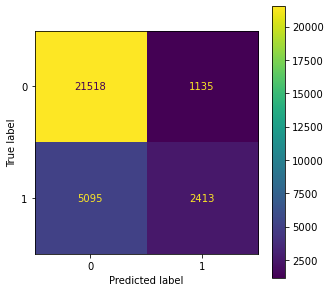

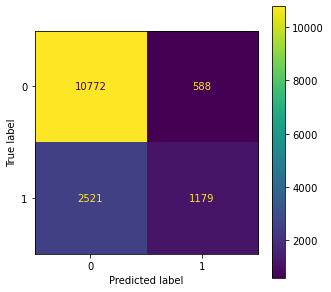

In [147]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gnb_classifier,X_train,y_train, ax = ax), plot_confusion_matrix(gnb_classifier,X_test,y_test, ax = bx)

In [148]:
mnb_classifier = MultinomialNB()

In [149]:
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [150]:
y_pred = mnb_classifier.predict(X_test)

In [151]:
print("Gaussian Naive Bayes model accuracy(in %):", sklearn.metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 77.49667994687915


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24d4120b880>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24d41205f10>)

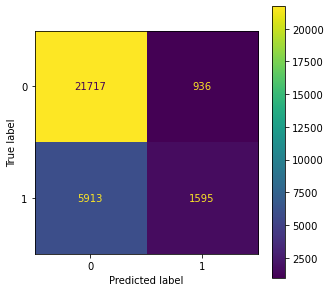

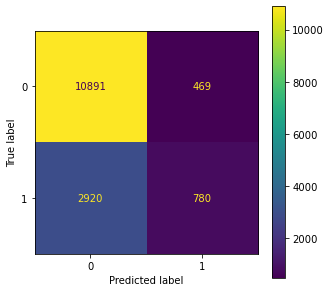

In [152]:
fig, ax = plt.subplots(figsize=(5, 5))
fig, bx = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(mnb_classifier,X_train,y_train, ax = ax), plot_confusion_matrix(mnb_classifier,X_test,y_test, ax = bx)

#### 8.Conclusion